# 以相似度为训练目标

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 训练数据生成器

In [2]:
!git clone https://github.com/daibiaoxuwu/05wan11_11
!git clone https://github.com/daibiaoxuwu/05wan11b2
#!git clone https://github.com/daibiaoxuwu/05wan12
#!git clone https://github.com/daibiaoxuwu/05wan12b
!git clone https://github.com/daibiaoxuwu/05wan13
!git clone https://github.com/daibiaoxuwu/05wan13b3
!git clone https://github.com/daibiaoxuwu/05wan14
!git clone https://github.com/daibiaoxuwu/05wan14b2
!git clone https://github.com/daibiaoxuwu/3181
!git clone https://github.com/daibiaoxuwu/3181bb
!git clone https://github.com/daibiaoxuwu/3182
!git clone https://github.com/daibiaoxuwu/3182b
!git clone https://github.com/daibiaoxuwu/317
!git clone https://github.com/daibiaoxuwu/317b

Cloning into '05wan11_11'...
remote: Enumerating objects: 30512, done.
remote: Counting objects: 100% (30512/30512), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30512 (delta 30504), reused 30512 (delta 30504), pack-reused 0
Receiving objects: 100% (30512/30512), 9.61 MiB | 10.43 MiB/s, done.
Resolving deltas: 100% (30504/30504), done.
Cloning into '05wan11b2'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 183 (delta 0), reused 183 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 859.93 KiB | 2.15 MiB/s, done.
Cloning into '05wan13'...
remote: Enumerating objects: 40909, done.
remote: Counting objects: 100% (40909/40909), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40909 (delta 40900), reused 40909 (delta 40900), pack-reused 0
Receiving objects: 100% (40909/40909), 8.82 MiB | 2.11 MiB/s, done.
Resolving deltas: 100% (40900/

In [0]:
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

datasizex = 9
datasizey = 9

picnum = 30
lowpercent = 125.0
highpercent = 233.0
enhance = 4
def read_data(path1,path2,sx,sy):

  x_train0 = []
  y_train0 = dict()
  idxes = dict()

  #read clock
  #read and /255
  for filename in os.listdir(path2):
      if 'git' in filename: continue
      ans = cv2.imread(os.path.join(path2,filename),cv2.IMREAD_GRAYSCALE).astype('float32')     
      ans = np.clip((ans-lowpercent)/(highpercent - lowpercent),0,1)
      y_train0[int(filename[:-4])]=ans

  keys = list(y_train0.keys())
  
  #read data
  #add an axis and /255
  
  filelist = os.listdir(path1)
  random.shuffle(filelist)
  index = 0
  for filename in filelist:
      if 'git' in filename or 'c.jpg' in filename: continue
      ftime = int(filename.split('_')[0])
      value = max(filter(lambda t:t<ftime,keys))
      if(abs(ftime-value)<10000):continue

      x_train0.append(cv2.imread(os.path.join(path1,filename)).astype('float32')/255.0)
      if value not in idxes:idxes[value]=[index]
      else: idxes[value].append(index)
      index += 1

  #index data
  print(len(x_train0),index,len(y_train0),len(idxes.keys()))
  lens = [len(i) for i in idxes.values()]
  print(min(lens),max(lens),np.average(lens))
  for key,val in list(idxes.items()):
    if len(val)<picnum:
      idxes.pop(key)
  

  #generator
  def data_generator(ikeys_t):
    while True:
      
      dataout = []

      '''
      while True:
        key = random.choice(ikeys_t)
        idx2 = random.sample(idxes[key],picnum)
        posx = random.randint(0,picsizex-datasizex)
        posy = random.randint(0,picsizey-datasizey)
        pic = x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:]
        if(np.sum(pic) < 175):
          for i in range(picnum):
            dataout[i].append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
          ansout.append(y_train0[key][posx:posx+datasizex,posy:posy+datasizey])
          break
      '''
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      posx = random.randint(0,x_train0[0].shape[0]-datasizex)
      posy = random.randint(0,x_train0[0].shape[1]-datasizey)
    
      for i in range(picnum):
        dataout.append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
      ansout = y_train0[key][posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance]
      yield dataout,ansout
      
  def pic_generator(ikeys_t):
    while True:
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      data=[x_train0[i] for i in idx2]
      ans=y_train0[key]
      yield data,ans

  #split
  ikeys = list(idxes.keys())
  random.shuffle(ikeys)
  ltrain = int(len(ikeys)*0.8)  
  train_generator = data_generator(ikeys[:ltrain])
  test_generator = data_generator(ikeys[ltrain:])
  train_pic_generator = pic_generator(ikeys[:ltrain])
  test_pic_generator = pic_generator(ikeys[ltrain:])

  return train_generator,test_generator,train_pic_generator,test_pic_generator



In [4]:

from matplotlib import pyplot as plt
picsizex = 18
picsizey = 38
train_generators = [0,0,0,0,0,0]
test_generators = [0,0,0,0,0,0]
train_pic_generators = [0,0,0,0,0,0]
test_pic_generators = [0,0,0,0,0,0]
train_generators[0],test_generators[0],train_pic_generators[0],test_pic_generators[0] = read_data('05wan11_11','05wan11b2',18,38)
train_generators[1],test_generators[1],train_pic_generators[1],test_pic_generators[1] = read_data('05wan13','05wan13b3',14,31)
train_generators[2],test_generators[2],train_pic_generators[2],test_pic_generators[2] = read_data('05wan14','05wan14b2',14,31)
train_generators[3],test_generators[3],train_pic_generators[3],test_pic_generators[3] = read_data('3182','3182b',10,47)
train_generators[4],test_generators[4],train_pic_generators[4],test_pic_generators[4] = read_data('3181','3181bb',10,47)
train_generators[5],test_generators[5],train_pic_generators[5],test_pic_generators[5] = read_data('317','317b',11,22)

def stack_generator(generators):
  while True:
    dataout = []
    for i in range(picnum):dataout.append([])
    ansout = []
    for train2 in range(32):
      data,ans=next(generators[random.randint(0,5)])
      for i in range(picnum):
        dataout[i].append(data[i])
      ansout.append(ans)
    yield [np.stack(data2) for data2 in dataout],np.stack(ansout)

train_generator = stack_generator(train_generators)
test_generator = stack_generator(test_generators)


27456 27456 181 138
79 207 198.95652173913044
36839 36839 608 190
87 202 193.88947368421051
48799 48799 344 305
97 186 159.9967213114754
58666 58666 355 351
100 189 167.13960113960113
48374 48374 435 278
14 188 174.0071942446043


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


1089.9352
0.0 1.0


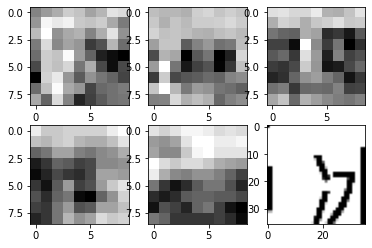

In [5]:
data,ans = next(test_generator)
for pics in data:
  for i in range(6):
    plt.subplot(231+i)
    plt.imshow(pics[i,:,:,0],cmap='gray')
ans[0,0,0]=0
ans[0,1,0]=1
plt.imshow(ans[0],cmap='gray')
print(np.sum(ans[0]))
print(np.min(ans[0]),np.max(ans[0]))

# 数据初始化完成。


# 装载Tensorflow

In [6]:

from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf

TensorFlow 2.x selected.



# 搭建模型和训练
现在的网络去掉dropout则可以拟合10张图片，
但是加上dropout就拟合不了。
从7张拟合5张的，则可以在两个epoch（每个epoch抽取60000次）内到80%。

继续训练20张，一个epoch就到60%。

In [0]:
inputs = [tf.keras.layers.Input(shape=(datasizex,datasizey,3))  for i in range(picnum)]
#inputs = tf.keras.layers.Input(shape=(5,12,12,1))
convg1 = 0
convd1 = 0
convh1 = inputs
inputs_big = inputs
for layernum in range(8):
  conv_a1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  conva1 = [conv_a1(convh1[i]) for i in range(picnum)]
  #drop_a1 = tf.keras.layers.Dropout(0.2)
  #conva1 = drop_a1(conva1)
  conv_b1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convb1 = [conv_b1(conva1[i]) for i in range(picnum)]
  

  conv_c1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convc1 = [conv_c1(inputs_big[i]) for i in range(picnum)]
  #drop_b1 = tf.keras.layers.Dropout(0.2)
  #convc1 = drop_a1(convc1)
  conv_d1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convd1 = [conv_d1(convc1[i]) for i in range(picnum)]
  

  convs1 = tf.stack(convb1)
  convf1 = [
      tf.math.reduce_max(convs1, axis=[0]),
      tf.math.reduce_mean(convs1, axis=[0]),
      tf.math.reduce_min(convs1, axis=[0]),
  ]

  conv_g1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convg1 = [conv_g1(convf1[i]) for i in range(3)]

  drop_c1 = tf.keras.layers.Dropout(0.2)
  convh1 = [drop_c1(tf.concat(convg1+[convd1[i]],axis=3)) for i in range(picnum)]
  if(layernum % 3 == 1):
    convex1 = tf.keras.layers.Conv2D(32, (1, 1), padding = 'Same',  activation='relu')
    convh1 = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in convh1]
    convh1 = [convex1(convh1[i]) for i in range(picnum)]
    inputs_big = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in inputs_big]
convh3 = tf.concat(convg1+convd1,axis=3)

convx1 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same',  activation='relu')(convh3)
convx2 = tf.keras.layers.Dropout(0.2)(convx1)
convx3 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu')(convx2)
'''
convx3 = tf.keras.layers.Flatten()(convx2)

#keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
convx4 = tf.keras.layers.Dropout(0.2)(convx3)

convy1 = tf.keras.layers.Dense(21*45)(convx4)
#convy3 = tf.keras.layers.Dense(10,activation='softmax')(convy1)
convy4 = tf.keras.layers.Reshape([21,45])(convy1)
'''

convx4 = tf.keras.layers.Conv2D(1, (3, 3), padding = 'Same')(convx3)

model = tf.keras.Model(inputs=inputs, outputs=convx4)


In [0]:
#tf.reduce_mean(tf.image.ssim(reconstructed, truth, 1.0))
model.compile(optimizer='adam',#tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                #loss=lambda y_pred,y_true:1-tf.reduce_mean(tf.image.ssim_multiscale(tf.clip_by_value(y_pred,0,1), y_true, 255))#-tf.reduce_mean(tf.image.psnr(tf.clip_by_value(y_pred,0,1), y_true, 1.0))
              loss='mse',
              metrics=['mse']
              )
            
#model.summary()

# 测试正确率：

In [0]:
from skimage.metrics import peak_signal_noise_ratio,structural_similarity, mean_squared_error
class show_accuracy(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch % 5 == 1:
      data,ans = next(test_generator)
      data = [data[x][5][np.newaxis,:,:,:] for x in range(picnum)]
      ans = ans[5]
      import matplotlib
      cmap = matplotlib.cm.gray 
      cmap.set_bad(color='black')

      pred = model.predict(data) #shape:(1,11,11,1) because last layer is conv not dense
      #pred = np.clip(pred,0,1)
      #pred = (pred-np.min(pred))/(np.max(pred)-np.min(pred))
      #pred = softmax(pred)
      pred[0,0,0,0]=0
      pred[0,-1,-1,0]=1
      ans[0,0]=0
      ans[-1,-1]=1
      for i in range(6):
        plt.subplot(231+i)
        plt.imshow(data[i][0,:,:,0],cmap=cmap)
      plt.show()
      plt.subplot(121)
      plt.imshow(pred[0,:,:,0],cmap=cmap)
      plt.colorbar()
      #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
      plt.subplot(122)
      plt.imshow(ans,cmap=cmap)
      plt.colorbar()
      plt.show()
#      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
#      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
     # print('mse',mean_squared_error(np.clip(pred[0,:,:,0],0,1),ans))



# 开始训练

In [0]:
#!cp -r "/content/drive/My Drive/checkpoints/training_15/" "/content/drive/My Drive/checkpoints/training_15_archive2"

In [0]:
# Suppress some level of logs
import logging
logging.getLogger("tensorflow").setLevel(logging.WARN)

In [12]:
#!ls "/content/drive/My Drive/checkpoints"
model.load_weights(tf.train.latest_checkpoint("/content/drive/My Drive/checkpoints/training_25/"))#,by_name=True)

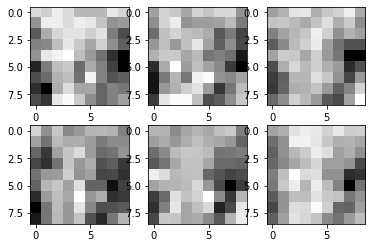

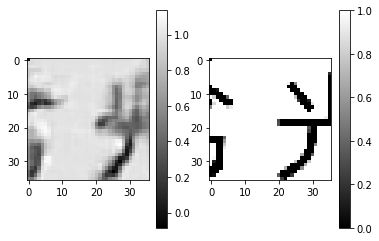

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 50 steps
Epoch 1/200
500/500 - 369s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 2/200


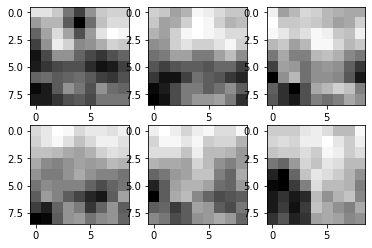

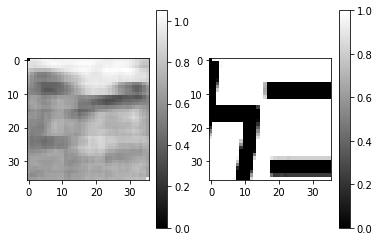

500/500 - 315s - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 3/200
500/500 - 311s - loss: 0.1277 - mse: 0.1277 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 4/200
500/500 - 311s - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1257 - val_mse: 0.1257
Epoch 5/200
500/500 - 311s - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 6/200
500/500 - 310s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 7/200


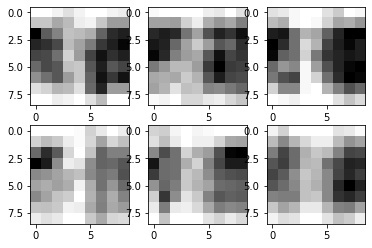

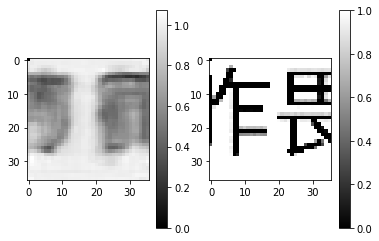

500/500 - 311s - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 8/200
500/500 - 310s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 9/200
500/500 - 310s - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 10/200
500/500 - 310s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 11/200
500/500 - 311s - loss: 0.1272 - mse: 0.1272 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 12/200


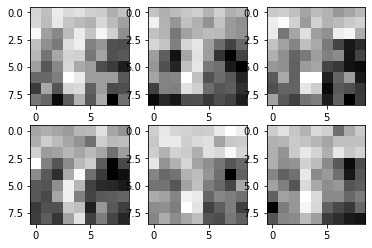

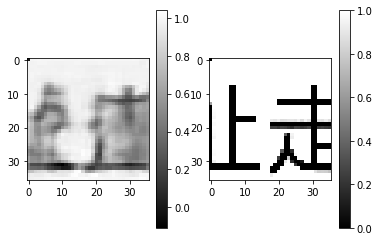

500/500 - 312s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 13/200
500/500 - 311s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1296 - val_mse: 0.1296
Epoch 14/200
500/500 - 311s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 15/200
500/500 - 311s - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 16/200
500/500 - 311s - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1292 - val_mse: 0.1292
Epoch 17/200


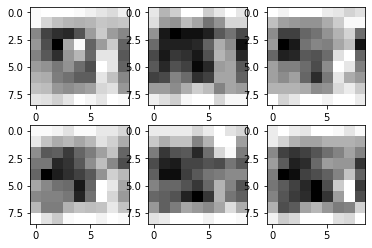

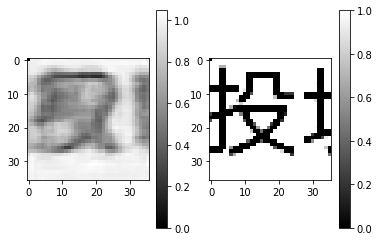

500/500 - 312s - loss: 0.1268 - mse: 0.1268 - val_loss: 0.1277 - val_mse: 0.1277
Epoch 18/200
500/500 - 311s - loss: 0.1269 - mse: 0.1269 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 19/200
500/500 - 311s - loss: 0.1274 - mse: 0.1274 - val_loss: 0.1288 - val_mse: 0.1288
Epoch 20/200
500/500 - 311s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 21/200
500/500 - 311s - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 22/200


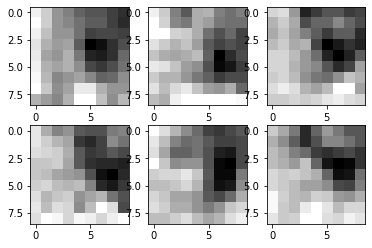

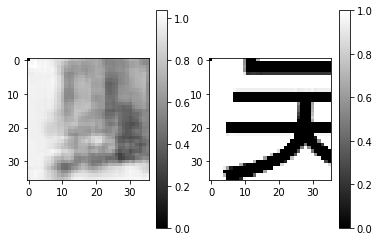

500/500 - 312s - loss: 0.1261 - mse: 0.1261 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 23/200
500/500 - 311s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 24/200
500/500 - 311s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1268 - val_mse: 0.1268
Epoch 25/200
500/500 - 311s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 26/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 27/200


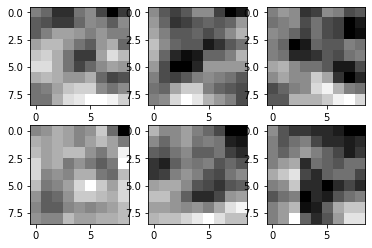

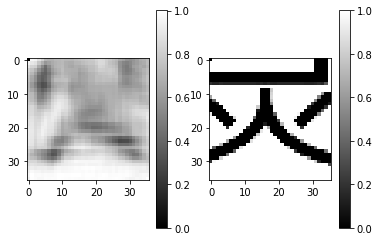

500/500 - 311s - loss: 0.1270 - mse: 0.1270 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 28/200
500/500 - 310s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 29/200
500/500 - 310s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 30/200
500/500 - 311s - loss: 0.1269 - mse: 0.1269 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 31/200
500/500 - 311s - loss: 0.1258 - mse: 0.1258 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 32/200


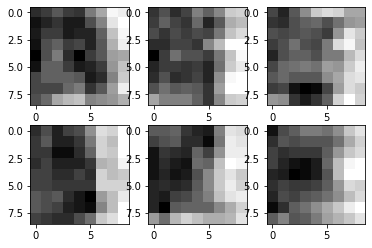

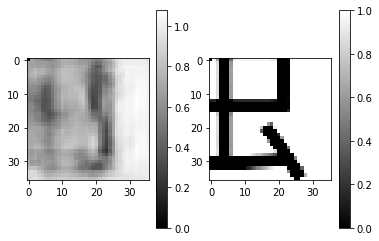

500/500 - 312s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 33/200
500/500 - 311s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1293 - val_mse: 0.1293
Epoch 34/200
500/500 - 311s - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 35/200
500/500 - 311s - loss: 0.1262 - mse: 0.1262 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 36/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 37/200


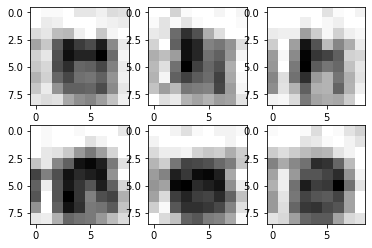

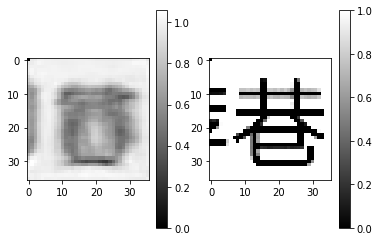

500/500 - 311s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1349 - val_mse: 0.1349
Epoch 38/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 39/200
500/500 - 310s - loss: 0.1262 - mse: 0.1262 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 40/200
500/500 - 310s - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 41/200
500/500 - 310s - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1283 - val_mse: 0.1283
Epoch 42/200


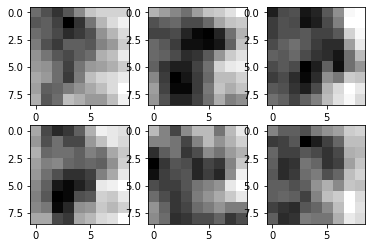

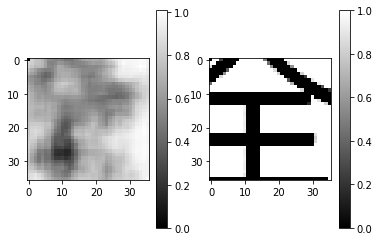

500/500 - 311s - loss: 0.1268 - mse: 0.1268 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 43/200
500/500 - 310s - loss: 0.1258 - mse: 0.1258 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 44/200
500/500 - 310s - loss: 0.1258 - mse: 0.1258 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 45/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1289 - val_mse: 0.1289
Epoch 46/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1279 - val_mse: 0.1279
Epoch 47/200


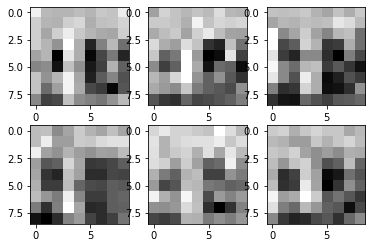

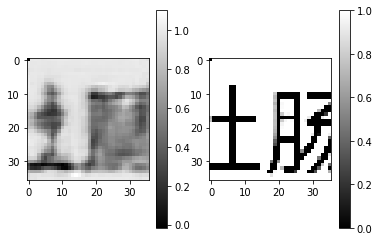

500/500 - 311s - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 48/200
500/500 - 310s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 49/200
500/500 - 310s - loss: 0.1273 - mse: 0.1273 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 50/200
500/500 - 310s - loss: 0.1266 - mse: 0.1266 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 51/200
500/500 - 310s - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 52/200


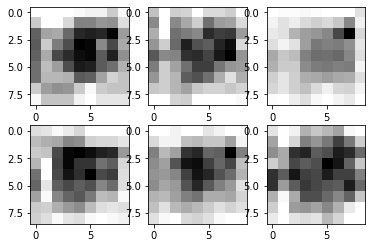

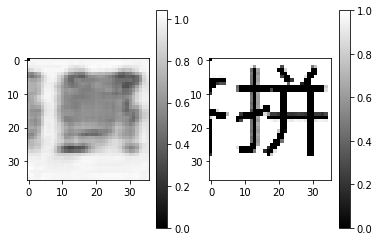

500/500 - 311s - loss: 0.1272 - mse: 0.1272 - val_loss: 0.1269 - val_mse: 0.1269
Epoch 53/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 54/200
500/500 - 310s - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 55/200
500/500 - 310s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 56/200
500/500 - 310s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 57/200


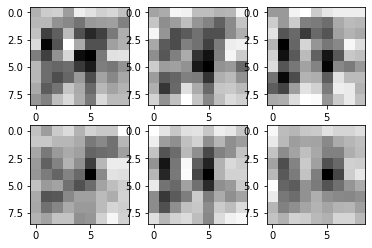

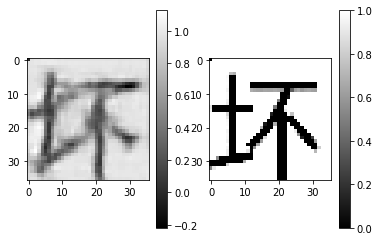

500/500 - 311s - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 58/200
500/500 - 310s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 59/200
500/500 - 310s - loss: 0.1262 - mse: 0.1262 - val_loss: 0.1262 - val_mse: 0.1262
Epoch 60/200
500/500 - 310s - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 61/200
500/500 - 310s - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 62/200


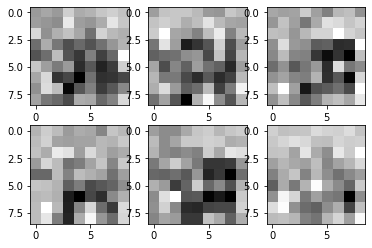

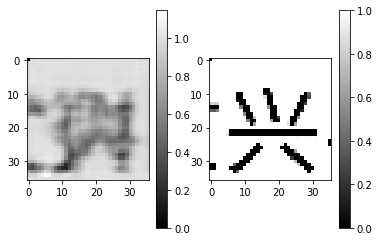

500/500 - 311s - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 63/200
500/500 - 310s - loss: 0.1263 - mse: 0.1263 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 64/200
500/500 - 310s - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 65/200
500/500 - 310s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 66/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 67/200


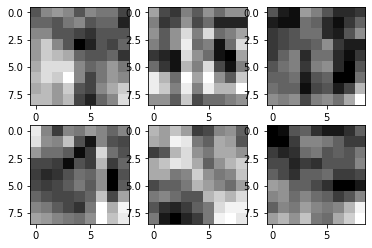

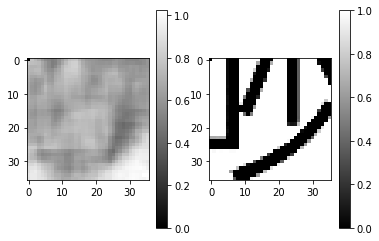

500/500 - 311s - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1254 - val_mse: 0.1254
Epoch 68/200
500/500 - 310s - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 69/200
500/500 - 310s - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 70/200
500/500 - 310s - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1273 - val_mse: 0.1273
Epoch 71/200
500/500 - 310s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 72/200


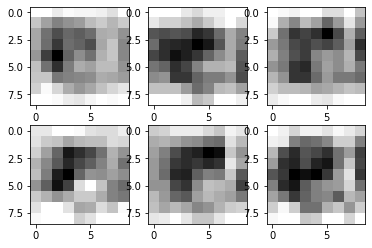

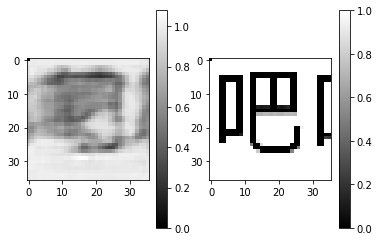

500/500 - 311s - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 73/200
500/500 - 310s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 74/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 75/200
500/500 - 310s - loss: 0.1252 - mse: 0.1252 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 76/200
500/500 - 310s - loss: 0.1261 - mse: 0.1261 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 77/200


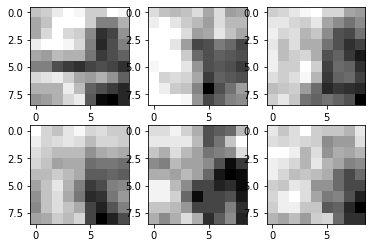

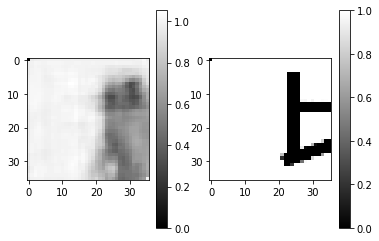

500/500 - 312s - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1260 - val_mse: 0.1260
Epoch 78/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 79/200
500/500 - 310s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1254 - val_mse: 0.1254
Epoch 80/200
500/500 - 310s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 81/200
500/500 - 310s - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 82/200


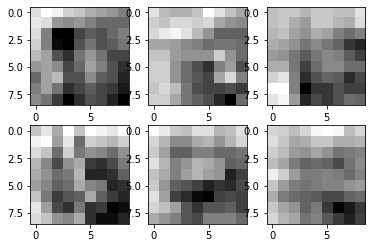

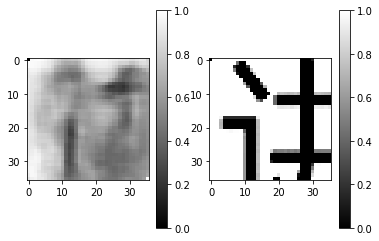

500/500 - 311s - loss: 0.1250 - mse: 0.1250 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 83/200
500/500 - 310s - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 84/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1272 - val_mse: 0.1272
Epoch 85/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1273 - val_mse: 0.1273
Epoch 86/200
500/500 - 310s - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1328 - val_mse: 0.1328
Epoch 87/200


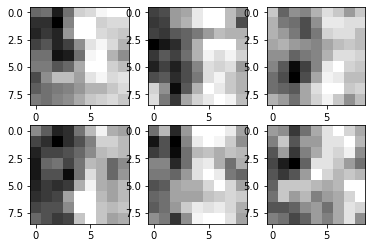

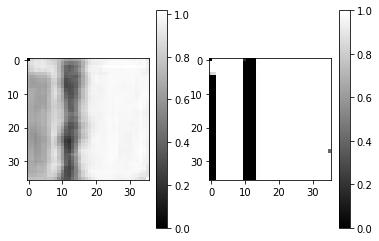

500/500 - 312s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1256 - val_mse: 0.1256
Epoch 88/200
500/500 - 311s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1264 - val_mse: 0.1264
Epoch 89/200
500/500 - 311s - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1257 - val_mse: 0.1257
Epoch 90/200
500/500 - 311s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1294 - val_mse: 0.1294
Epoch 91/200
500/500 - 311s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 92/200


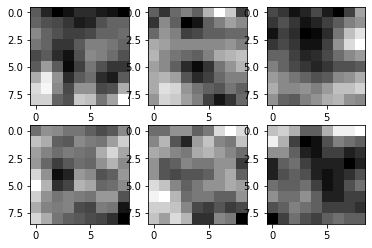

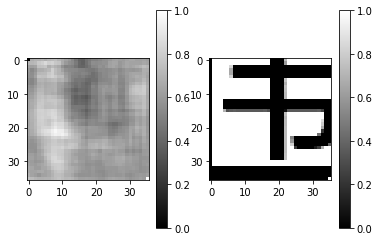

500/500 - 312s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1277 - val_mse: 0.1277
Epoch 93/200
500/500 - 311s - loss: 0.1250 - mse: 0.1250 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 94/200
500/500 - 311s - loss: 0.1250 - mse: 0.1250 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 95/200
500/500 - 311s - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1249 - val_mse: 0.1249
Epoch 96/200
500/500 - 311s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 97/200


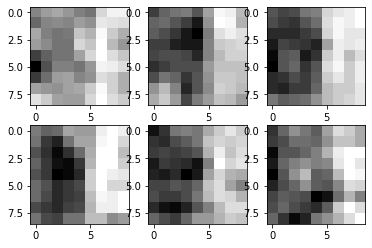

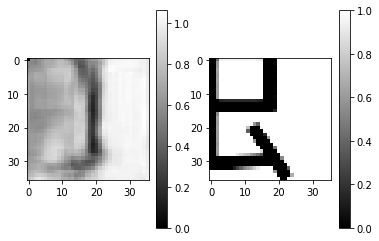

500/500 - 312s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1259 - val_mse: 0.1259
Epoch 98/200
500/500 - 311s - loss: 0.1248 - mse: 0.1248 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 99/200
500/500 - 311s - loss: 0.1256 - mse: 0.1256 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 100/200
500/500 - 311s - loss: 0.1257 - mse: 0.1257 - val_loss: 0.1271 - val_mse: 0.1271
Epoch 101/200
500/500 - 311s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 102/200


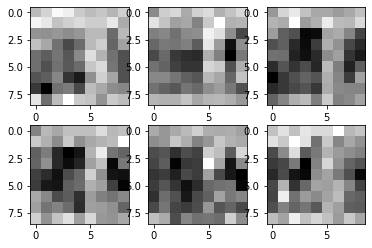

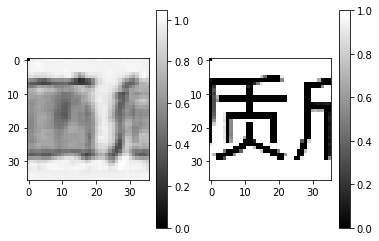

500/500 - 312s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1290 - val_mse: 0.1290
Epoch 103/200
500/500 - 311s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 104/200
500/500 - 310s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1255 - val_mse: 0.1255
Epoch 105/200
500/500 - 311s - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 106/200
500/500 - 310s - loss: 0.1255 - mse: 0.1255 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 107/200


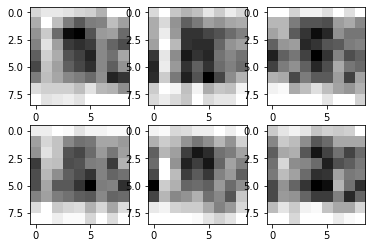

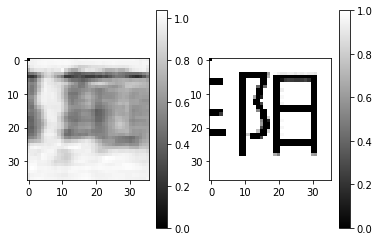

500/500 - 311s - loss: 0.1250 - mse: 0.1250 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 108/200
500/500 - 311s - loss: 0.1241 - mse: 0.1241 - val_loss: 0.1246 - val_mse: 0.1246
Epoch 109/200
500/500 - 310s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 110/200
500/500 - 310s - loss: 0.1252 - mse: 0.1252 - val_loss: 0.1261 - val_mse: 0.1261
Epoch 111/200
500/500 - 311s - loss: 0.1248 - mse: 0.1248 - val_loss: 0.1270 - val_mse: 0.1270
Epoch 112/200


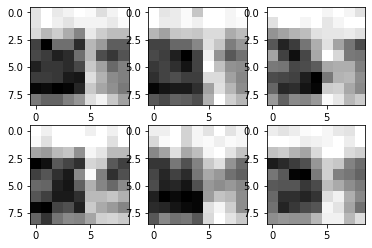

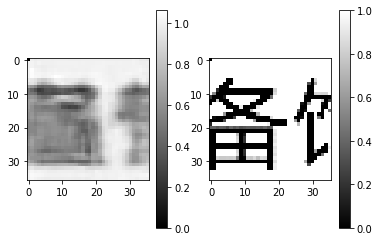

500/500 - 311s - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 113/200
500/500 - 310s - loss: 0.1249 - mse: 0.1249 - val_loss: 0.1277 - val_mse: 0.1277
Epoch 114/200
500/500 - 310s - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1273 - val_mse: 0.1273
Epoch 115/200
500/500 - 310s - loss: 0.1251 - mse: 0.1251 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 116/200


In [0]:
#checkpoint_path = "training_16/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_path = "/content/drive/My Drive/checkpoints/training_26/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_dir):
  model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))#,by_name=True)
  print("=======================================load weights!=======================================")
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,monitor='val_loss')#,save_best_only=True,mode='min')
show_accuracy_callback = show_accuracy()
show_accuracy_callback.on_epoch_end(epoch=1)
model.fit_generator(train_generator,epochs=200,steps_per_epoch=500,validation_data=test_generator,validation_steps=50,validation_freq=1,verbose=2,callbacks=[cp_callback,show_accuracy_callback])


# 验证模型

In [0]:
def predict_pic(xpics,model):
  # xpic: array of 5 with size(22,52,1)
  picout = np.zeros((picsizex*enhance,picsizey*enhance),dtype=np.float32)
  piclayer = np.zeros((picsizex*enhance,picsizey*enhance),dtype=int)
  for posx in range(0,picsizex+1-datasizex):
    for posy in range(0,picsizey+1-datasizey):
      dataout = [pic[np.newaxis,posx:posx+datasizex,posy:posy+datasizey,:] for pic in xpics]
      pred = model.predict(dataout)
      picout[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += pred[0,:,:,0]
      piclayer[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += np.ones((datasizex*enhance,datasizey*enhance),dtype=int)
  picout /= piclayer
  return picout


In [0]:
import matplotlib
cmap = matplotlib.cm.gray 
cmap.set_bad(color='black')
for ti in range(10):    
  data,ans = next(test_pic_generators[0])



  pred = predict_pic(data,model)

  for i in range(6):
    plt.subplot(231+i)
    b,g,r = cv2.split(data[i])       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)

  plt.show()      
  pred[0,0]=0
  pred[-1,-1]=1
  ans[0,0]=0
  ans[-1,-1]=1
  plt.subplot(121)
  plt.imshow(pred,cmap=cmap)
  plt.colorbar()
  #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
  plt.subplot(122)
  plt.imshow(ans,cmap=cmap)
  plt.colorbar()
  plt.show()
  #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
  #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
  print('mse',mean_squared_error(np.clip(pred,0,1),ans))
